In [ ]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/ironhack-final-project')

In [ ]:
import you_nlp

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/raw_data/INvideos_final_cleaned.csv")

In [ ]:
data_nlp, frq = you_nlp.get_key_words(data, "en")

In [ ]:
stop_words = list(stopwords.words('english')) 

In [ ]:
key_word_df, final_freq = you_nlp.create_keywords_df(data_nlp, frq, stop_words, "IN_EN")

In [ ]:
final_freq

[('movie', 31136),
 ('song', 26269),
 ('new', 24167),
 ('telugu', 23879),
 ('video', 22537),
 ('full', 16872),
 ('subscribe', 14840),
 ('music', 14484),
 ('facebook', 13905),
 ('live', 13137),
 ('funny', 12628),
 ('hindi', 12352),
 ('nfollow', 11543),
 ('twitter', 10891),
 ('dial', 10009),
 ('film', 9765),
 ('singh', 9590),
 ('trailer', 9418),
 ('nsubscribe', 8895),
 ('youtube', 8662),
 ('app', 8081),
 ('follow', 7839),
 ('etv', 7247),
 ('malayalam', 7054),
 ('current', 6899),
 ('nfacebook', 6774),
 ('sharma', 6675),
 ('kumar', 6645),
 ('th', 6638),
 ('show', 6469),
 ('series', 6465),
 ('nmusic', 6311),
 ('download', 6299),
 ('bollywood', 6277),
 ('pawan', 6276),
 ('nlike', 5986),
 ('vijay', 5965),
 ('nfor', 5935),
 ('reddy', 5887),
 ('sri', 5806),
 ('sridevi', 5721),
 ('kalyan', 5620),
 ('ntwitter', 5527),
 ('instagram', 5419),
 ('online', 5396),
 ('tollywood', 4930),
 ('status', 4888),
 ('whatsapp', 4852),
 ('kapoor', 4746),
 ('also', 4680),
 ('rani', 4367)]

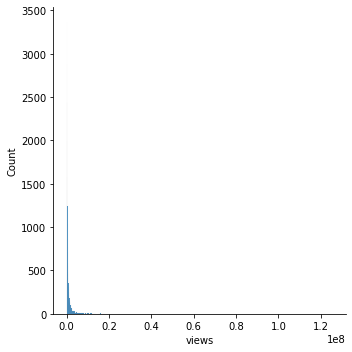

In [ ]:
sns.displot(key_word_df["views"])

In [ ]:
key_word_df_outl = you_nlp.remove_outliers(key_word_df)

category_id
1.0
25.5
21.5
views
726533.0
1946379.5
-959752.5
likes
16035.0
41052.5
-23087.5
dislikes
995.0
2601.5
-1378.5
comment_count
1379.0
3542.5
-1973.5
likes_rate
0.027624514059887396
0.0735699784740344
-0.036928077765515196
dislikes_rate
0.0010831313052347999
0.0033383494282374997
-0.0009941757927016998
movie
1.0
2.5
-1.5
song
new
1.0
2.5
-1.5
telugu
video
2.0
5.0
-3.0
full
1.0
2.5
-1.5
subscribe
1.0
2.5
-1.5
music
facebook
1.0
2.5
-1.5
live
funny
hindi
nfollow
twitter
1.0
2.5
-1.5
dial
film
singh
trailer
nsubscribe
youtube
app
follow
etv
malayalam
current
nfacebook
sharma
kumar
th
show
series
nmusic
download
bollywood
pawan
nlike
vijay
nfor
reddy
sri
sridevi
kalyan
ntwitter
instagram
online
tollywood
status
whatsapp
kapoor
also
rani
0 rows have been removed, 0.0% in total


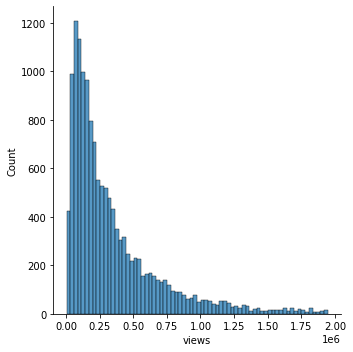

In [ ]:
sns.displot(key_word_df_outl["views"])

In [ ]:
key_word_df_outl["views"].describe()

count    1.424600e+04
mean     3.421814e+05
std      3.397608e+05
min      4.024000e+03
25%      1.099608e+05
50%      2.219780e+05
75%      4.472478e+05
max      1.945044e+06
Name: views, dtype: float64

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


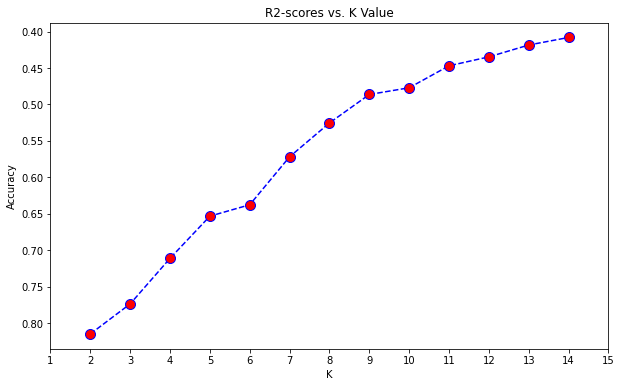

Please enter k:2


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.8748331489998946
MSE: 1301876323.9484563
RMSE: 36081.52330415744
MAE: 6843.045361262805
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.8247441222424368
MSE: 1956259969.309417
RMSE: 44229.627731978675
MAE: 10358.667752640997
-----------------------------
Filename Linear: IN_EN_Likes_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.08893895061917245
MSE: 9476061755.836105
RMSE: 97345.06539027084
MAE: 38237.278238729166
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.0811044847900867
MSE: 10256994146.979645
RMSE: 101276.8193960476
MAE: 38446.72387911026
-----------------------------
Filename Linear: IN_EN_Likes_linear

In [ ]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df, "likes", "IN_EN_Likes")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


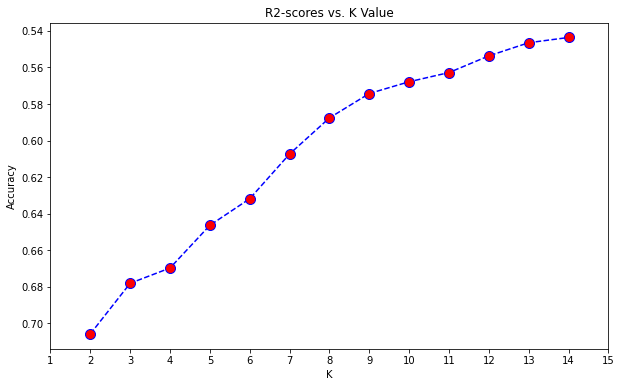

Please enter k:2


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.9128670984595013
MSE: 3653013.5894347276
RMSE: 1911.2858471287668
MAE: 958.0776295578668
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.785283961730763
MSE: 8928828.685751615
RMSE: 2988.11457038575
MAE: 1458.5055105366514
-----------------------------
Filename Linear: IN_EN_Likes_Out_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.3172163902626627
MSE: 28625441.835590642
RMSE: 5350.274930841465
MAE: 3377.893897950127
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.3031315542818679
MSE: 28978827.191851526
RMSE: 5383.198602304352
MAE: 3338.0692497396617
-----------------------------
Filename Linear: IN_EN_Likes_Out_

In [ ]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df_outl, "likes", "IN_EN_Likes_Out")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


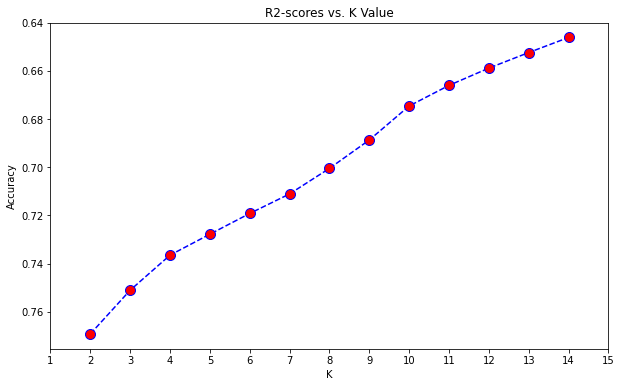

Please enter k:2


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.9205986606488487
MSE: 7.185563170445027e-05
RMSE: 0.008476770122189834
MAE: 0.0040567434951608895
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.8197323896170887
MSE: 0.00015380871988824094
RMSE: 0.012401964356030094
MAE: 0.006299118012650092
-----------------------------
Filename Linear: IN_EN_Likes_Rate_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.30070472711423735
MSE: 0.0006328394960558537
RMSE: 0.02515630131907021
MAE: 0.017165876060101618
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.30476263530224035
MSE: 0.0005931934686186615
RMSE: 0.024355563401791007
MAE: 0.0170870402917017
-------------------------

In [ ]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df, "likes_rate", "IN_EN_Likes_Rate")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


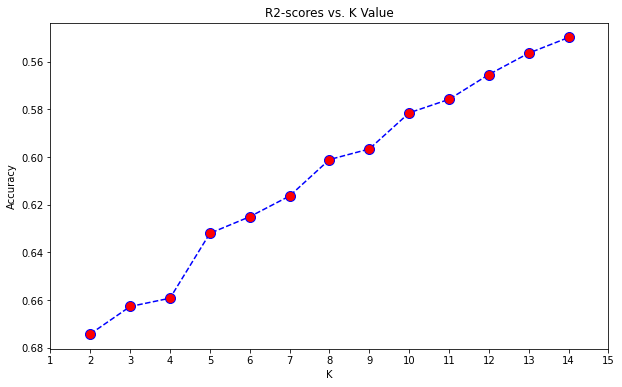

Please enter k:2


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.8954575811524834
MSE: 2.0390237220634235e-05
RMSE: 0.00451555502907829
MAE: 0.0022125860698093856
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.7775720747178917
MSE: 4.346021209017474e-05
RMSE: 0.0065924359754323545
MAE: 0.003325728938557376
-----------------------------
Filename Linear: IN_EN_Likes_Rate_Out_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.32078747896511695
MSE: 0.00013247545426824879
RMSE: 0.011509798185383129
MAE: 0.007686676274280829
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.3141427282155931
MSE: 0.00013400971329267084
RMSE: 0.011576256445529827
MAE: 0.0076471112430392335
----------------

In [ ]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df_outl, "likes_rate", "IN_EN_Likes_Rate_Out")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


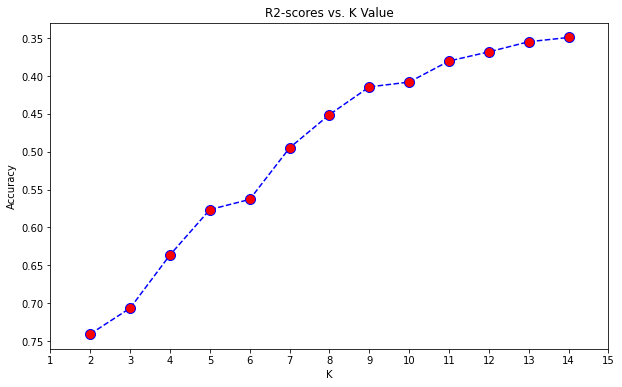

Please enter k:2


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.8478270078724948
MSE: 1710860886312.2825
RMSE: 1307998.80975186
MAE: 334289.87514389976
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.7592956542683948
MSE: 2969237275773.1343
RMSE: 1723147.491009732
MAE: 506116.8399876816
-----------------------------
Filename Linear: IN_EN_Views_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.11240003679328625
MSE: 9979169355296.582
RMSE: 3158982.329057347
MAE: 1268831.059344356
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.10769309480849865
MSE: 11007158662929.31
RMSE: 3317703.823871159
MAE: 1296019.7940532083
-----------------------------
Filename Linear: IN_EN_Views_linear.

In [ ]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df, "views", "IN_EN_Views")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


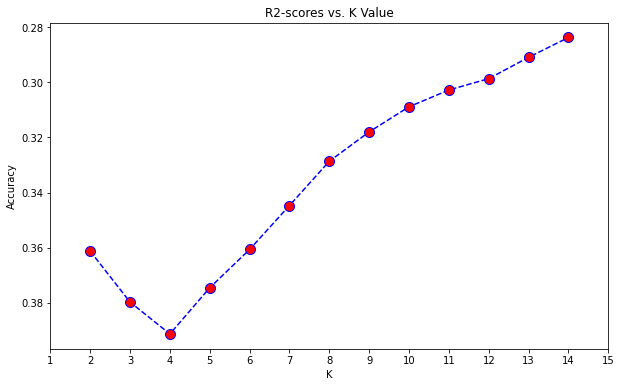

Please enter k:4


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.7510902759840629
MSE: 29124302021.750427
RMSE: 170658.43671424635
MAE: 109146.80613958905
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.5225441205468953
MSE: 53328667563.036766
RMSE: 230930.005765896
MAE: 152370.93118276025
-----------------------------
Filename Linear: EN_IN_Views_Out_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.12636766230551288
MSE: 102221526939.43361
RMSE: 319721.0142287079
MAE: 229101.31060621788
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.13066030335651602
MSE: 97099501077.99457
RMSE: 311607.9284581741
MAE: 219976.16102048304
-----------------------------
Filename Linear: EN_IN_Views

In [ ]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df_outl, "views", "IN_EN_Views_Out")

In [ ]:
max_depth_choices=[3,4,5,6,7,8,9,10,None]
min_sample_split=[5 , 10, 15]
min_sample_leaf=[5, 10, 15]
max_samples=[0.2, 0.6, 0.8, 0.9]
random_state=[5, 10, 13]

In [ ]:
random_forest = {'max_depth': max_depth_choices,    
                'min_samples_split': min_sample_split,
                'min_samples_leaf': min_sample_leaf,
                'max_samples': max_samples,
                'random_state': random_state
               }